In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/GitHub/img-gen

/content/gdrive/My Drive/GitHub/img-gen


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing img_gen.egg-info/PKG-INFO
writing dependency_links to img_gen.egg-info/dependency_links.txt
writing top-level names to img_gen.egg-info/top_level.txt
writing manifest file 'img_gen.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying img_gen/img.py -> build/lib/img_gen
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/__init__.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/models.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/gan.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/img.py -> build/bdist.linux-x86_64/egg/img_gen
copying build/lib/img_gen/cycle_gan.py -> build/bdist.linux-x86_64/egg/img_gen
byte-compiling build/bdist.linux-x86_64/egg/img_gen/__init__.py to __init__.cpython-37.pyc
byte-compiling build/bdist.linux-x86_64/egg/img

In [ ]:
%pip install tensorflow_addons

     |████████████████████████████████| 686kB 14.6MB/s 


In [2]:
import tensorflow as tf

# setup tensorflow to use a GPU if available
if tf.test.gpu_device_name():
    print(f"Default GPU Device: {tf.test.gpu_device_name()}")
    tf.device(tf.test.gpu_device_name())

In [3]:
import tensorflow_datasets as tfds

# load the data set
data, metadata = tfds.load(
    "cycle_gan/monet2photo",
    with_info=True,
    as_supervised=True,
)

train_x, train_y = data["trainA"], data["trainB"]
test_x, test_y = data["testA"], data["testB"]

In [4]:
# preprocess data

from img_gen.img import preprocess_images

train_x = preprocess_images(train_x, jitter=True)
train_y = preprocess_images(train_y, jitter=True)
test_x = preprocess_images(test_x)
test_y = preprocess_images(test_y)

In [5]:
# build model

from img_gen.cycle_gan import CycleGAN

cyc_gan = CycleGAN()

epoch: 0 ................................................................................................... time taken: 3717.257875919342s
gen_g:  [[[[3.9778647]
   [3.865579 ]
   [3.8721185]
   [3.8252146]
   [3.8243766]
   [3.9613597]
   [3.9320042]
   [3.9719315]
   [3.9817507]
   [4.038746 ]
   [3.9507136]
   [4.022359 ]
   [4.0531797]
   [3.9236424]
   [3.966269 ]
   [4.00423  ]]

  [[3.958311 ]
   [3.8646088]
   [3.8549042]
   [3.8667893]
   [3.9017937]
   [3.9612312]
   [4.1124916]
   [4.0421906]
   [4.093935 ]
   [3.9929836]
   [4.058199 ]
   [4.2744036]
   [3.980889 ]
   [3.9592342]
   [3.939903 ]
   [4.0282583]]

  [[4.037194 ]
   [3.9828773]
   [3.9922757]
   [3.902118 ]
   [3.9842007]
   [4.069339 ]
   [4.088524 ]
   [4.016777 ]
   [4.046113 ]
   [4.110899 ]
   [4.1964684]
   [4.136175 ]
   [4.1539664]
   [4.1851654]
   [4.021993 ]
   [4.0039363]]

  [[4.13097  ]
   [4.1064897]
   [3.9769666]
   [3.9469526]
   [3.9799745]
   [4.0267096]
   [4.139271 ]
   [4.0601406]
   [4.

/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


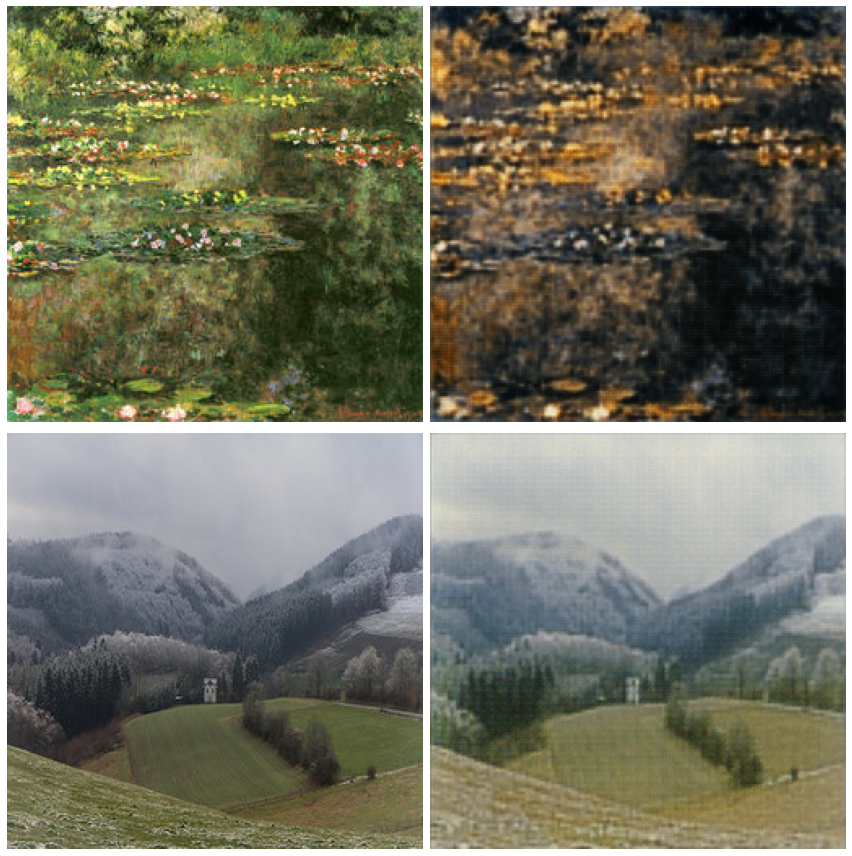

In [6]:
# train
cyc_gan.train(train_x, train_y, test_x, test_y, checkpoints=False)

(1, 1, 16, 16, 1)
gen_g:  [[[[3.9778647]
   [3.865579 ]
   [3.8721185]
   [3.8252146]
   [3.8243766]
   [3.9613597]
   [3.9320042]
   [3.9719315]
   [3.9817507]
   [4.038746 ]
   [3.9507136]
   [4.022359 ]
   [4.0531797]
   [3.9236424]
   [3.966269 ]
   [4.00423  ]]

  [[3.958311 ]
   [3.8646088]
   [3.8549042]
   [3.8667893]
   [3.9017937]
   [3.9612312]
   [4.1124916]
   [4.0421906]
   [4.093935 ]
   [3.9929836]
   [4.058199 ]
   [4.2744036]
   [3.980889 ]
   [3.9592342]
   [3.939903 ]
   [4.0282583]]

  [[4.037194 ]
   [3.9828773]
   [3.9922757]
   [3.902118 ]
   [3.9842007]
   [4.069339 ]
   [4.088524 ]
   [4.016777 ]
   [4.046113 ]
   [4.110899 ]
   [4.1964684]
   [4.136175 ]
   [4.1539664]
   [4.1851654]
   [4.021993 ]
   [4.0039363]]

  [[4.13097  ]
   [4.1064897]
   [3.9769666]
   [3.9469526]
   [3.9799745]
   [4.0267096]
   [4.139271 ]
   [4.0601406]
   [4.2443447]
   [4.179649 ]
   [4.1766453]
   [4.1460285]
   [4.1482954]
   [4.030585 ]
   [4.1057067]
   [4.043138 ]]

  [[4.

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1, 16, 16, 1)

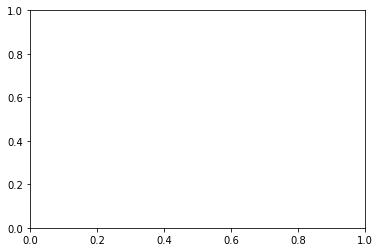

In [11]:
cyc_gan.print_losses()
cyc_gan.plot_losses()

Test Results


/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


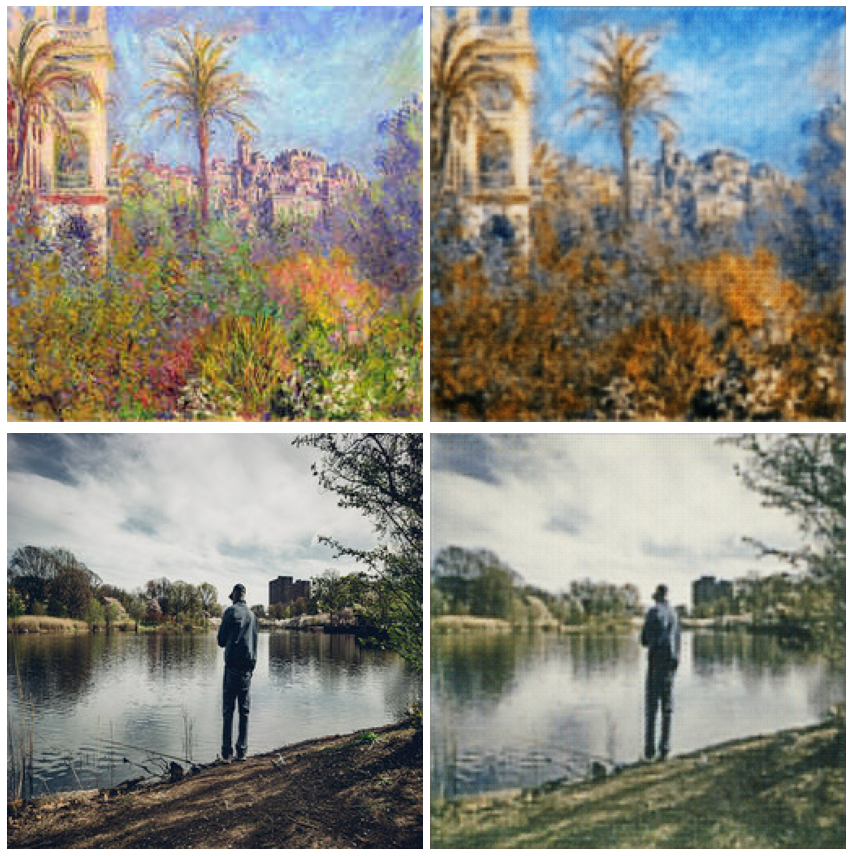

In [12]:
print("Test Results")
cyc_gan.generate_images(test_x, test_y)

In [14]:
gen_g_loss, gen_f_loss, dis_x_loss, dis_y_loss = cyc_gan.score(test_x, test_y)
print("Test Losses")
print(f"gen_g: {gen_g_loss}, gen_f: {gen_f_loss}, dis_x: {dis_x_loss}, dis_y: {dis_y_loss}")